In [13]:
import numpy as np
import pandas as pd
from pandas_datareader import data as da
import matplotlib as mtplt
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import datetime
import scipy.optimize as optimization
    
    
    

In [80]:
stocks=['INFY.NS','RELIANCE.NS','ITC.NS','BAJFINANCE.NS','SBIN.NS','TATASTEEL.NS','TATAMOTORS.NS','IOC.NS','CIPLA.NS','ULTRACEMCO.NS']
#stocks from different sector
start_date='2020-07-12'
end_date='2021-09-10'


def Download_Data(stocks):
    data = pd.DataFrame()
    for stock in stocks:
        data[stock] = da.DataReader(stock, data_source = 'yahoo' , start=start_date,end=end_date)['Adj Close']
    return data


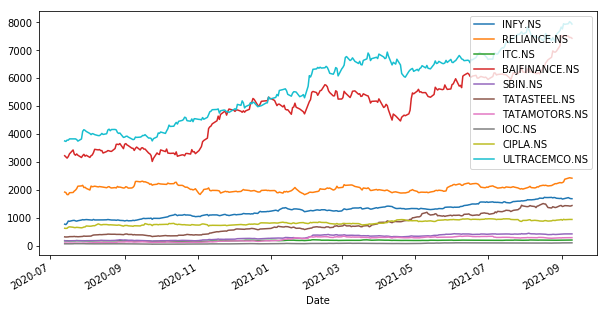

Mean Returns:
INFY.NS          0.672520
RELIANCE.NS      0.199152
ITC.NS           0.108198
BAJFINANCE.NS    0.724129
SBIN.NS          0.710097
TATASTEEL.NS     1.294642
TATAMOTORS.NS    0.884733
IOC.NS           0.325833
CIPLA.NS         0.349620
ULTRACEMCO.NS    0.650050
dtype: float64
Covariance_Matrix:
                INFY.NS  RELIANCE.NS    ITC.NS  BAJFINANCE.NS   SBIN.NS  \
INFY.NS        0.058790     0.009270  0.004446       0.006748  0.009053   
RELIANCE.NS    0.009270     0.079144  0.011275       0.027257  0.022908   
ITC.NS         0.004446     0.011275  0.051524       0.026992  0.038178   
BAJFINANCE.NS  0.006748     0.027257  0.026992       0.131484  0.072334   
SBIN.NS        0.009053     0.022908  0.038178       0.072334  0.128286   
TATASTEEL.NS   0.016129     0.020159  0.024468       0.050695  0.061405   
TATAMOTORS.NS  0.019950     0.031724  0.028095       0.062598  0.081747   
IOC.NS         0.008528     0.026638  0.023727       0.034562  0.045064   
CIPLA.NS       0.

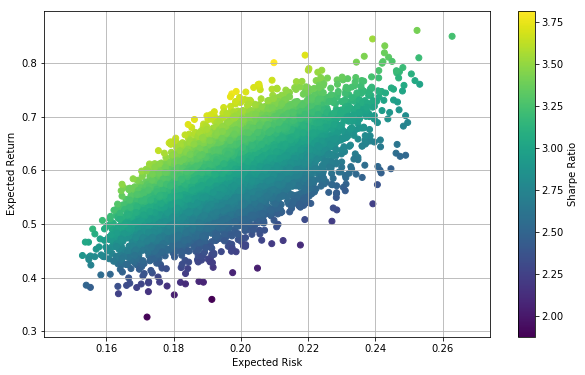

[0.2001344  0.01840565 0.00302315 0.13359917 0.01134567 0.23075484
 0.09648126 0.03538778 0.0472241  0.22364398]


In [82]:
Num_Port=10000
def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

def Returns(data):
    #daily log returns
    log_returns=np.log(data/data.shift(1))
    log_returns=log_returns[1:]
    return log_returns

def Statistics(returns):
    #*252 for annual metrics/mean of annual return
    mean_return=returns.mean()*252
    covariance=returns.cov()*252
    print('Mean Returns:')
    print(mean_return)
    print('Covariance_Matrix:')
    print(covariance)
    return mean_return,covariance

def Mean_Variance(mean_return,Covariance,weights):
    #portfolio mean variance
    portfolio_return=np.sum(mean_return*weights)*252
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    print('Expected Portfolio Return=',portfolio_return)
    print('Expected Portfolio Volatility=',portfolio_volatility)
    return 


def Show_Portfolios(returns,risks):
    plt.figure(figsize=(10,6))
    plt.scatter(risks,returns,c=returns/risks,marker='o')
    plt.grid(True)
    plt.xlabel("Expected Risk")
    plt.ylabel("Expected Return")
    plt.colorbar(label="Sharpe Ratio")
    plt.show()
    
    
def Genrate_Portfolios(returns):
    portfolio_mean=[]
    portfolio_risk=[]
    portfolio_weights=[]
    
    for i in range(Num_Port):
        #genrating random weights Num_port times and then normalizing by dividing the whole w_array by sum(w) so that the sum of weights is 1.
        w=np.random.random(len(stocks))
        w=w/np.sum(w)
        portfolio_weights.append(w)
        portfolio_mean.append(np.sum(returns.mean()*w)*252)
        portfolio_risk.append(np.sqrt(np.dot(w.T,np.dot(returns.cov()*252,w))))
    return np.array(portfolio_weights),np.array(portfolio_mean),np.array(portfolio_risk)
    

def Stats(Weights,Returns):
    portfolio_return=np.sum(mean_return*weights)*252
    portfolio_volatility=np.sqrt(np.dot(w.T,np.dot(returns.cov()*252,w)))

data=Download_Data(stocks)
show_data(data)
log_daily_returns=Returns(data)
Mean_return,Covariance=Statistics(log_daily_returns)
Weights,p_means,p_risks=Genrate_Portfolios(log_daily_returns)

Show_Portfolios(p_means,p_risks)
Sharpe_Ratio=[]
for i in range(len(p_means)):
    #taking risk free rate as 0 for calculating Sharpe
    Sharpe_Ratio.append(p_means[i]/p_risks[i])
max_SR=max(Sharpe_Ratio)

index=Sharpe_Ratio.index(max_SR)
#OPW=Optimum Portfolio Weights
OPW=Weights[index]
print(OPW)



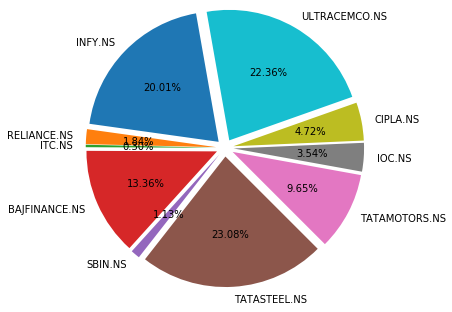

In [83]:
OPW=OPW*100
k=[0.1 for i in range(len(OPW))]
plt.axis("equal")
plt.pie(OPW,labels=stocks,radius=1.5,autopct='%0.2f%%',explode=k,startangle=100)
plt.show()
